In [36]:
import numpy, scipy, os, matplotlib, imageio
import pandas as pd
from scipy.optimize import curve_fit
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib notebook
import scipy.signal as sg


basefile = '/home/tejaswik/Documents/CurrentProjects/melmot/'
colHeads=['id','frame','time','RHX','RHY','RHZ','LHX','LHY','LHZ']


parts = os.listdir(basefile+'data/ind/')

In [37]:
allpieces = {}
for i in range(0,len(parts),1):
    folder = basefile+'data/ind/'+parts[i]
    pieces = os.listdir(folder)
    allpieces['{0}'.format(parts[i])] = pieces

    
for key in allpieces:
    for i in range(0,32,1):
        allpieces[key][i] = allpieces[key][i][:-4]
        
pitches = os.listdir(basefile+'sound/pitch/')
pitches

['6.txt',
 '12.txt',
 '3.txt',
 '8.txt',
 '1.txt',
 '9.txt',
 '4.txt',
 '14.txt',
 '7.txt',
 '2.txt',
 '16.txt',
 '15.txt',
 '5.txt',
 '10.txt',
 '13.txt',
 '11.txt']

In [4]:
'''this is broken'''
# for key in allpieces:
#     folder = basefile+key
#     pieces = os.listdir(folder)    
#     for i in range(0,len(pieces),1):
#         file1 = folder+'/'+allpieces[key][i]+'.tsv'
#         df1=pd.read_table(file1,header=None)
#         df1.columns=colHeads
# #        allpieces[key][i] = AutoVivification(df1)
#         allpieces[key][i] = {allpieces[key][i]:df1}
#DO YOU EVEN NEED THIS IF INDIV NAME IS STORED IN FILE NAME ITSELF
#this does not let you retrieve keys of keys

'this is broken'

In [38]:
'''Functions'''
def settostrat(stri,y):
    s ='s'+str(y)
    eval(s).append(stri)
    return
    
# def readfile(stri):
#     fil = basefile+'/datadump/'+stri+'.tsv'
#     df1=pd.read_table(fil,header=None)
#     df1.columns=colHeads
#     return(df1)

# def qom(stri):
#     fil = basefile+'/datadump/'+stri+'.tsv'
#     df1=pd.read_table(fil,header=None)
#     df1.columns=colHeads
#     df = df1.iloc[:,2:]
#     qomval = numpy.sqrt(numpy.square(df).sum(axis =1))
#     return(qomval)

    
def readfile(stri):
    fil = basefile+'/normdatadump/'+stri+'.csv'
    df1=pd.read_table(fil,header=None)
    df1.columns=colHeads
    return(df1)

def qom(stri):
    fil = basefile+'data/normdatadump/'+stri+'.csv'
    df1=pd.read_table(fil,header=None)
    df1.columns=colHeads
    df = df1.iloc[:,2:]
    qomval = numpy.sqrt(numpy.square(df).sum(axis =1))
    return(qomval)
    
def getlhrh(stri):
    lh = makedf(stri)[:,2:4]
    rh = makedf(stri)[:,5:7]
    return(lh,rh)
    
def upsamp(stri):
    y = readfile(stri)
    y = sg.resample(y,600)
    y = scale(y, axis=0, with_mean=True, with_std=True, copy=True )
    y = pd.DataFrame(y)
    return(y)

def ups(array):
    y = sg.resample(array,600)
#    y = scale(y,axis=0,with_mean=True,with_std=True,copy = True)
    y = pd.DataFrame(y)
    return(y)

def readpitch(stri):
    fil = basefile+'sound/pitch/'+stri
    z = pd.read_csv(fil, sep='   ', engine = 'python',header =0)
    return(z)
    

def returnDetails(string):
    split = string.split('_')
    partID = split[0]
    melID = split[1]
    typeID = split[2]
    return{'partID':partID, 'melID':melID, 'typeID':typeID}

class AutoVivification(dict):
    """Implementation of perl's autovivification feature."""
    def __getitem__(self, item):
        try:
            return dict.__getitem__(self, item)
        except KeyError:
            value = self[item] = type(self)()
            return value

In [39]:
'''Finding all pieces that have MelID bet 1 and 16'''
normMels = []
synMels = []
im = [1,2,3,4,17,18,19,20]
jo = [5,6,7,8,21,22,23,24]
sc = [9,10,11,12,25,26,27,28]
vo = [13,14,15,16,29,30,31,32]
alljo, allim, allsc, allvo = ([] for i in range(4))
s1,s2,s3,s4,s5,s6 = ([]for i in range(6))

folder = basefile+'data/datadump/'
pieces = os.listdir(folder)
for i in range(0,len(pieces),1):
    pieces[i] = pieces[i][:-4]
    melID = returnDetails(pieces[i])['melID']
    typeID = returnDetails(pieces[i])['typeID']
    settostrat(pieces[i],typeID) #distribute according to piece ID
    if int(melID) <= 16:
        normMels.append(pieces[i])
    elif int(melID)>16:
        synMels.append(pieces[i])
    if int(melID) in im:
        allim.append(pieces[i])
    elif int(melID) in jo:
        alljo.append(pieces[i])
    elif int(melID) in sc:
        allsc.append(pieces[i])
    elif int(melID) in vo:
        allvo.append(pieces[i])

<IPython.core.display.Javascript object>


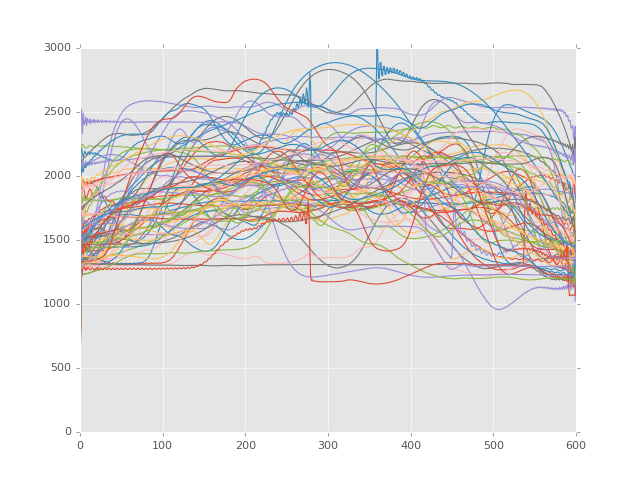

In [13]:
'''plot genre qoms'''
qomjo,qomvo,qomim,qomsc = ([]for i in range(4))
fig, ax1 = plt.subplots()
# for i in range(0,len(alljo)):
#     qomjo.append(qom(alljo[i]))
#     ax1.plot(qomjo[i])
# for i in range(0,len(allvo)):
#     qomvo.append(qom(allvo[i]))
#     ax1.plot(qomvo[i])
# for i in range(0,len(allsc)):
#     qomsc.append(qom(allsc[i]))
#     ax1.plot(qomsc[i])
for i in range(0,len(allim)):
    qomim.append(qom(allim[i]))
    ax1.plot(qomim[i])

<IPython.core.display.Javascript object>


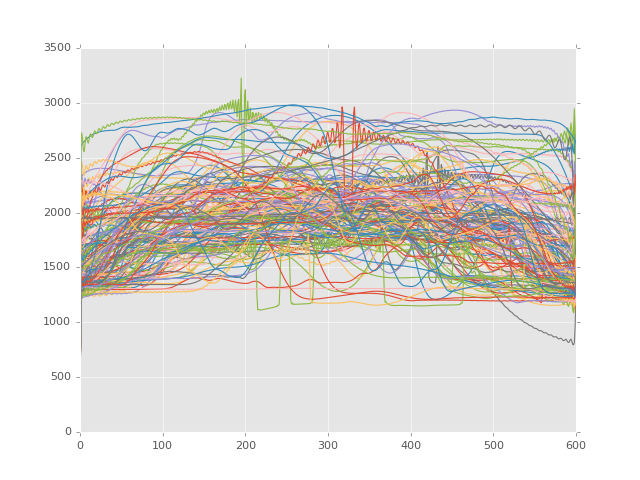

In [14]:
qomnorm = []
qomsyn = []
fig, ax2 = plt.subplots()
for i in range(0,len(synMels)):
    qomsyn.append(qom(synMels[i]))
    ax2.plot(qomsyn[i])

<IPython.core.display.Javascript object>


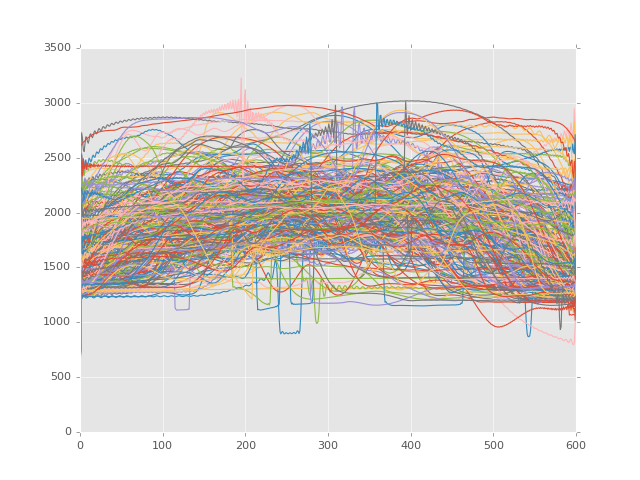

In [15]:
'''plot all qoms of strategies 1-6'''
qoms1,qoms2,qoms3,qoms4,qoms5,qoms6 = ([]for i in range(6))
fig, ax = plt.subplots()
for i in range(0,len(s1)):
    qoms1.append(qom(s1[i]))
    ax.plot(qoms1[i])
for i in range(0,len(s2)):
    qoms2.append(qom(s2[i]))
    ax.plot(qoms2[i])
for i in range(0,len(s3)):
    qoms3.append(qom(s3[i]))
    ax.plot(qoms3[i])
for i in range(0,len(s4)):
    qoms4.append(qom(s4[i]))
    ax.plot(qoms4[i])
for i in range(0,len(s5)):
    qoms5.append(qom(s5[i]))
    ax.plot(qoms5[i])
for i in range(0,len(s6)):
    qoms6.append(qom(s6[i]))
    ax.plot(qoms6[i])

In [16]:
'''plot all hands'''
# qomim[0]
# RHZ, RHY, RHX, LHZ, LHY, LHX = ([] for i in range(0,6))
# fig, ax3 = plt.subplots()
# fig, ax4 = plt.subplots()
# fig, ax5 = plt.subplots()
# fig, ax6 = plt.subplots()
# fig, ax7 = plt.subplots()
# fig, ax8 = plt.subplots()
# for i in range(0,len(pieces)):
#     RHZ.append(readfile(pieces[i])['RHZ'])
#     RHX.append(readfile(pieces[i])['RHX'])
#     RHY.append(readfile(pieces[i])['RHY'])
#     LHZ.append(readfile(pieces[i])['LHZ'])
#     LHX.append(readfile(pieces[i])['LHX'])
#     LHY.append(readfile(pieces[i])['LHY'])
#     ax3.plot(RHZ[i])
#     ax4.plot(RHX[i])
#     ax5.plot(RHY[i])
#     ax6.plot(LHZ[i])
#     ax7.plot(LHX[i])
#     ax8.plot(LHY[i])

# '''send all norm pieces to /data/normdatadump/'''
# for i in range(0,len(pieces)):
#     file_name = pieces[i]+'.csv'
#     y = upsamp(pieces[i])
#     y.to_csv(file_name,sep='\t')

'''normnorm'''


'normnorm'

<IPython.core.display.Javascript object>


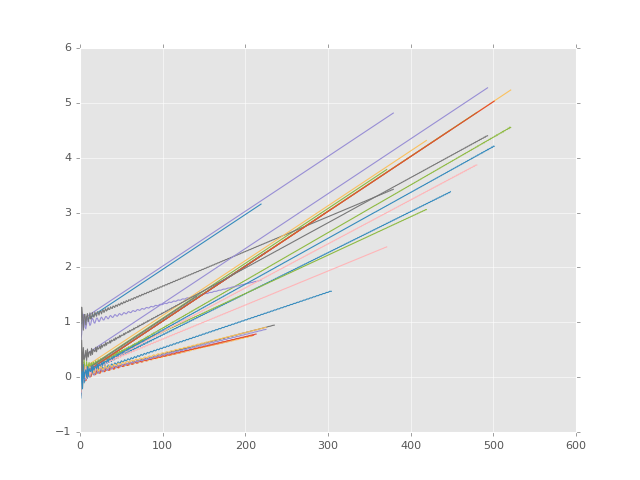

In [18]:
pitches = []
fig, ax9= plt.subplots()
for i in range(1,17,1):
    strings = str(i)+'.txt'
    pitches.append(readpitch(strings))
    
for i in range(0,16,1):
    pitches[i]['F0_Hz'] = ups(pitches[i])
    
for i in range(0,16,1):
    ax9.plot(pitches[i])

In [35]:
newseries = pd.Series(pitches)
newseries[1]['F0_Hz']
pitches[1]['F0_Hz']

0      0.024966
1     -0.303176
2     -0.130365
3      0.148568
4      0.208700
5      0.059985
6     -0.066999
7     -0.026501
8      0.101400
9      0.151196
10     0.081682
11     0.002441
12     0.017300
13     0.099202
14     0.141998
15     0.101950
16     0.044212
17     0.048639
18     0.107995
19     0.146284
20     0.121753
21     0.076552
22     0.075421
23     0.121134
24     0.156174
25     0.141317
26     0.104557
27     0.100053
28     0.136452
29     0.168926
         ...   
206    0.835453
207    0.841689
208    0.844522
209    0.845498
210    0.848583
211    0.854848
212    0.861120
213    0.864301
214    0.865468
215    0.868340
216    0.874276
217    0.880542
218    0.884039
219    0.885422
220    0.888125
221    0.893741
222    0.899960
223    0.903740
224    0.905354
225    0.907934
226    0.913241
227    0.919378
228    0.923405
229    0.925263
230    0.927762
231    0.932778
232    0.938801
233    0.943038
234    0.945145
235    0.947604
Name: F0_Hz, dtype: floa